# World Temperature

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from math import *
from util import *

plt.rcParams["figure.figsize"] = (16, 10)

## Parseo de datos

In [10]:
df = pd.read_csv('data/worldTemperature.csv')

fechas = list(df['year'])
temps = list(df['temp'])

#res = cml(lambda x: [x*2, x], [1,2,3], [1,1,1])
#res(5)

## f(x) = w1\*x + w2\*1

0.163376334191


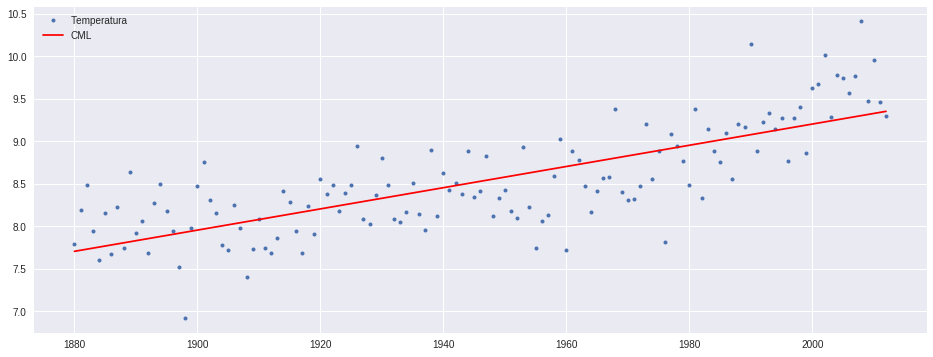

In [11]:
funcionCML = cml(lambda x: [x, 1], fechas, temps)
results = list(map(funcionCML, fechas))

plt.plot(fechas, temps, 'o', label='Temperatura', markersize=4)
plt.plot(fechas, results, 'r', label='CML')
plt.legend()
print(ecm(results, temps))

## f(x) = w1\*x^2 + w2\*x + w3\*1

0.132319040187


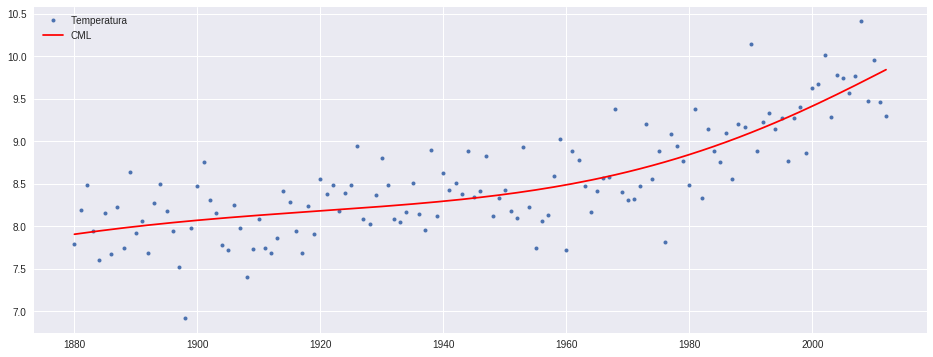

In [12]:
f = cml(poly(30), fechas, temps)
results = list(map(f, fechas))

plt.plot(fechas, temps, 'o', label='Temperatura', markersize=4)
plt.plot(fechas, results, 'r', label='CML')
plt.legend()
print(ecm(results, temps))

## f(x) con grado harcodeado

1 0 1.43895220469
1 1 0.180314756511
1 2 0.245850437342
1 3 1.37348476385
3 0 21.6300524809
3 1 0.329202470485
3 2 0.879824058415
3 3 15.0414897239


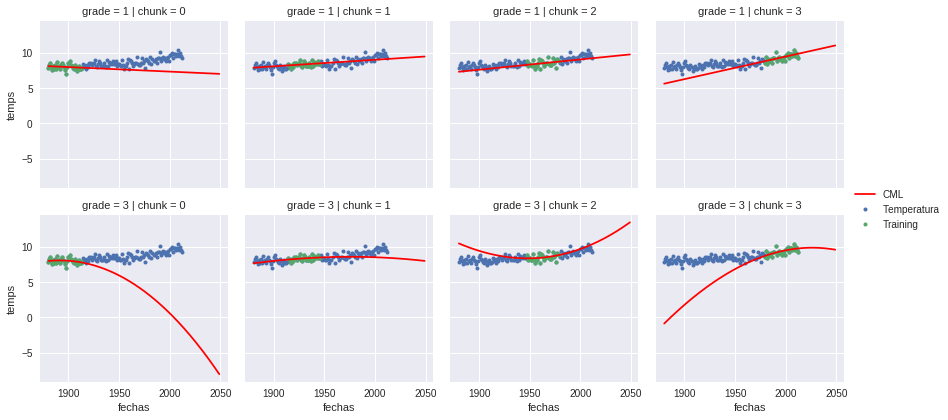

In [13]:
n = 66
lol = fechas + list(range(2013, 2050))
grados = [1, 3]
fechas_c = np.array_split(fechas, 4)
temps_c = np.array_split(temps, 4)
data = []
for g in grados:
    for c in range(4):
        f = cml(poly(g), fechas_c[c], temps_c[c])
        results = list(map(f, lol))
        data.append([results, g, c])
        print(g, c, ecm(list(map(f, fechas)), temps))

df2 = pd.DataFrame(data, columns=['x', 'grade', 'chunk'])

def pp(x, y, data, **kwargs):
    c = data['chunk'].values[0]
    plt.plot(fechas, temps, 'o', label='Temperatura', markersize=4)
    plt.plot(fechas_c[c], temps_c[c], 'o', label='Training', markersize=4)
    plt.plot(lol, data['x'].values[0], 'r', label='CML')
    
l = sns.FacetGrid(df2, col="chunk", row="grade", size=3)
l.map_dataframe(pp, 'fechas', 'temps')
l.add_legend()

# ECM vs Grado de polinomio

(0.13231904018740376, 30)


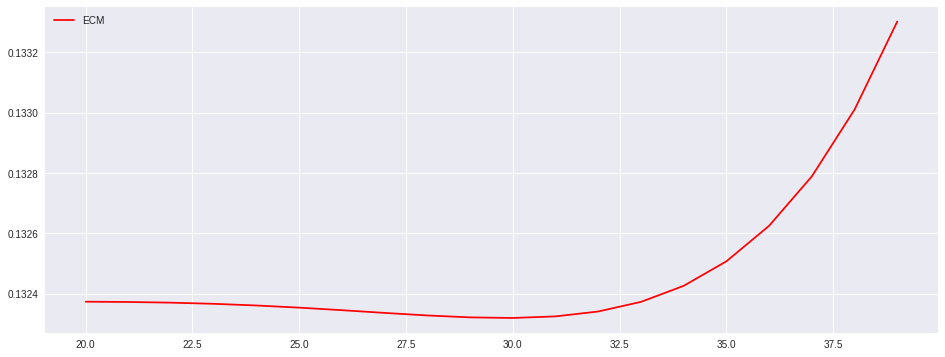

In [14]:
ecms = []

grados = range(20, 40, 1)
for grado in grados:
    f = cml(poly(grado), fechas, temps)
    results = list(map(f, fechas))
    ecms.append(ecm(results, temps))
    
m = min(zip(ecms, grados), key=lambda x: x[0])
print(m)

plt.plot(grados, ecms, 'r', label='ECM')
#plt.plot(fechas, results, 'r', label='CML')
plt.legend()

## Mido cuando comienza el calentamiento global

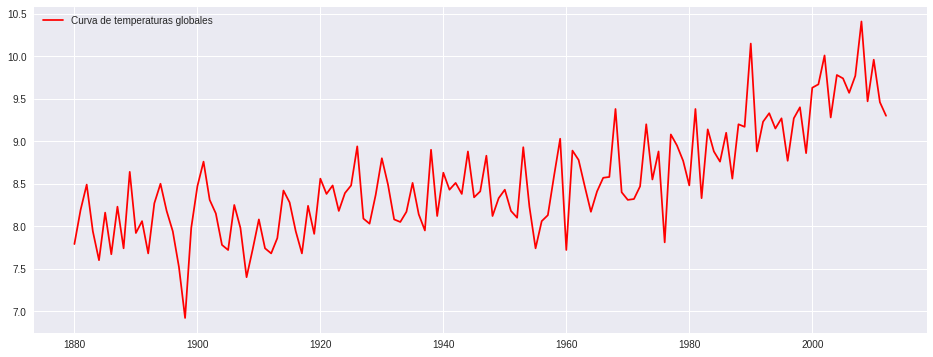

In [15]:
plt.plot(fechas, temps, 'r', label='Curva de temperaturas globales')
plt.legend()
plt.show()

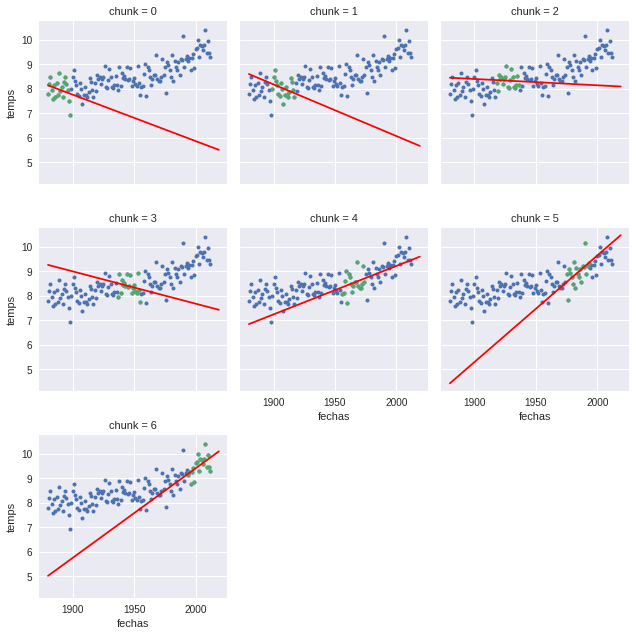

In [12]:
#Parto en 7 chuncks de 20 años (aprox) y veo las pendientes
fechasChunk = np.array_split(fechas,7)
tempChunk = np.array_split(temps,7)

fechasMasRango = fechas + list(range(2013,2020))

data = []
for c in range(7):
    f = cml(poly(1), fechasChunk[c], tempChunk[c])
    results = list(map(f, fechasMasRango))
    data.append([results, c])

df3 = pd.DataFrame(data, columns=['x', 'chunk'])

def pp(x, y, data, **kwargs):
    c = data['chunk'].values[0]
    plt.plot(fechas, temps, 'o', label='Temperatura', markersize=4)
    plt.plot(fechasChunk[c], tempChunk[c], 'o', label='Training', markersize=4)
    plt.plot(fechasMasRango, data['x'].values[0], 'r', label='CML')
    plt.legend()

l = sns.FacetGrid(df3, col="chunk", col_wrap = 3)
l.map_dataframe(pp, 'fechas', 'temps')

In [ ]:
palette = sns.color_palette('Paired')

df2 = pd.read_csv('data/worldTemperature.csv')
df2['prev1'] = df2['temp'].shift(1)
df2['prev2'] = df2['temp'].shift(2)
df2 = df2[2:]
#df2['chunk'] = ((df2['year'] - 1882) / 20).apply(lambda x: int(math.floor(x)))
#df2 = df2[df2['chunk'] <= 12]

def lol2(df2, offset):
    allResults = []
    for o in offset:
        df_t = df2[df2['year'] < o + 20]
        df_t = df_t[df_t['year'] >= o]

        df_r = df2[df2['year'] >= o + 20]
        df_r = df_r[df_r['year'] < o + 30]

        xs = df_t[['year', 'prev1', 'prev2']].as_matrix()

        f = cml(lambda x: [1, x[0], x[1], x[2]], xs, df_t['temp'])
        results_t = list(map(f, df_t[['year', 'prev1', 'prev2']].as_matrix()))
        results_r = list(map(f, df_r[['year', 'prev1', 'prev2']].as_matrix()))
    allResults.append(results_t,results_r,df_t,df_r)
    return allResults


def pp2(x, y, data, **kwargs):
    plt.plot(df_t['year'], df_t['temp'], 'o', label='Training', markersize=4, color=palette[1])
    plt.plot(df_r['year'], df_r['temp'], 'o', label='Test', markersize=4, color=palette[3])

    plt.plot(df_t['year'], results_t, 'r', label='CML Test', color=palette[0])
    plt.plot(df_r['year'], results_r, 'r', label='CML Result', color=palette[2])
    plt.legend()
    ecm_error = ecm(results_r, df_r['temp'])
    plt.title('{} | ECM = {} '.format('World', ecm_error))
    #plt.show()

allResults = lol2(df2, list(range(1880,1990,10)))
#lol2(1970)

#VOY A REHACER TODO ESTO PORQUE NO SE ENTIENDE

ecm chunk nro 0 =  0.269469146715
ecm chunk nro 1 =  0.0592855783581
ecm chunk nro 2 =  0.371654891532
ecm chunk nro 3 =  0.325739522952
ecm chunk nro 4 =  0.267309580463
ecm chunk nro 5 =  0.269685122932
ecm chunk nro 6 =  0.403332531628
ecm chunk nro 7 =  0.197246782636
ecm chunk nro 8 =  0.0746153506926
ecm chunk nro 9 =  0.223197790088
ecm chunk nro 10 =  0.218987176954
ecm chunk nro 11 =  0.212421195844


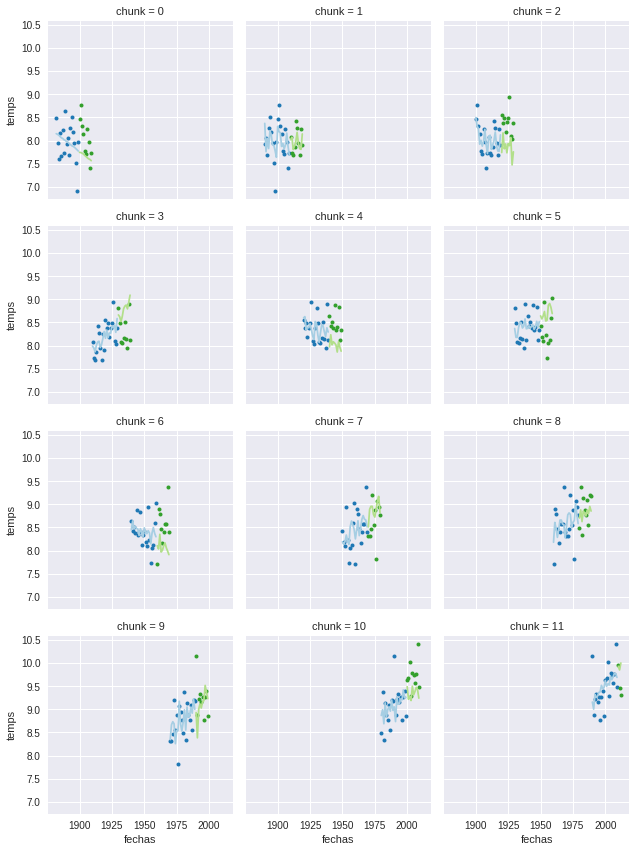

In [14]:
palette = sns.color_palette('Paired')

k = 2  #cantidad de valores anteriores para AR

df = pd.read_csv('data/worldTemperature.csv')
colapsarK(df,k)

def foo2(df, offset):
    df_t = df[df['year'] < offset + 20]
    df_t = df_t[df_t['year'] >= offset]
    df_r = df[df['year'] >= offset + 20]
    df_r = df_r[df_r['year'] < offset + 30]
    xs = df_t[['year', 'prev1', 'prev2']].as_matrix()
    f = cml(ar(k), xs, df_t['temp'])
    results_t = list(map(f, df_t[['year', 'prev1', 'prev2']].as_matrix()))
    results_r = list(map(f, df_r[['year', 'prev1', 'prev2']].as_matrix()))
    return (results_t,results_r,df_t,df_r)

def foo(df,arrOff):
    allResults = []
    for o in arrOff:
        # Hago esto porque me esta editando el dataframe cada vez
        # y no me sirve
        newDf = df.copy(deep=True)
        allResults.append(foo2(newDf,o))
    return allResults
    
#allResults es una lista que tiene: (results_t, results_r, df_t, df_r)
allResults = foo(df,list(range(1880,2000,10)))

#genero un dataframe resultados | chunks
data = []
for i in range(len(allResults)):
    data.append([allResults[i][0] + allResults[i][1] , i])

ndf = pd.DataFrame(data,columns=['x','chunk'])

def pp(x, y, data, **kwargs):
    c = data['chunk'].values[0]
    #plt.plot(list(df['fechas']), list(df['temps']), 'o', label='Temperatura', markersize=4)

    #Dejo esto como comentario para que vean que se esta imprimiendo
    #plt.plot(df_t['year'], df_t['temp'], 'o', label='Training', markersize=4, color=palette[1])
    #plt.plot(df_r['year'], df_r['temp'], 'o', label='Test', markersize=4, color=palette[3])
    plt.plot(allResults[c][2]['year'], allResults[c][2]['temp'], 'o', label='Training', markersize=4, color=palette[1])
    plt.plot(allResults[c][3]['year'], allResults[c][3]['temp'], 'o', label='Test', markersize=4, color=palette[3])

    #plt.plot(df_t['year'], results_t, 'r', label='CML Test', color=palette[0])
    #plt.plot(df_r['year'], results_r, 'r', label='CML Result', color=palette[2])
    plt.plot(allResults[c][2]['year'], allResults[c][0], 'r', label='CML Test', color=palette[0])
    plt.plot(allResults[c][3]['year'], allResults[c][1], 'r', label='CML Result', color=palette[2])
    plt.legend()
    print("ecm chunk nro " + str(c) + " = ", ecm(allResults[c][1], allResults[c][3]['temp']))
    #plt.title('{} | ECM = {} '.format('World', ecm_error))

l = sns.FacetGrid(ndf, col="chunk", col_wrap = 3)
l.map_dataframe(pp, 'fechas', 'temps')